In [23]:
import pandas as pd
import numpy as np

In [24]:
# Load the synthetic dataset
df = pd.read_csv('../data/synthetic_data.csv', parse_dates=['date', 'expiry_date'])
df = df.sort_values(['store_id', 'product_id', 'date']).reset_index(drop=True)
print(f"Dataset loaded with {df.shape[0]} records and {df.shape[1]} features")
df.head()

Dataset loaded with 10000 records and 26 features


,date,store_id,prescription_id,prescription_flag,product_id,product_category,manufacturer,units_sold,price,discount_percent,...,lead_time_days,stock_out_flag,holiday_flag,special_event_flag,delivery_time_hours,delivery_delay_flag,competitor_price_index,customer_segment_id,day_of_week,month_of_year
0,2025-01-01,store_1,7a2dc68e-ee63-4b15-a2db-6057de671bfd,0,prod_1,Prescription,Sun Pharma,8,44.47,0,...,12,1,0,1,30.44,0,1.01,retail,2,1
1,2025-01-04,store_1,3c825243-791a-45ad-846f-8072dc0f69e1,0,prod_1,OTC,Pfizer,5,18.88,30,...,5,0,1,0,20.25,0,1.13,retail,5,1
2,2025-01-05,store_1,eff8978e-988c-414c-87e3-26e0f617620a,0,prod_1,Prescription,Pfizer,4,82.47,10,...,1,0,1,0,19.20,0,1.10,wholesale,6,1
3,2025-01-06,store_1,1fa445b3-11a5-4cf9-9cb3-4c5fcee01aec,0,prod_1,OTC,Novartis,7,62.52,10,...,7,0,0,0,18.26,0,1.15,wholesale,0,1
4,2025-01-20,store_1,1b3a9c55-a49c-4724-85bd-e20c5efd1cf7,1,prod_1,Supplement,Sun Pharma,6,23.71,20,...,11,0,0,0,22.70,0,0.99,retail,0,1


Lag Features

In [25]:
df['units_sold_lag_1'] = df.groupby(['store_id', 'product_id'])['units_sold'].shift(1)
df['units_sold_lag_7'] = df.groupby(['store_id', 'product_id'])['units_sold'].shift(7)


In [26]:
df.head(20)

,date,store_id,prescription_id,prescription_flag,product_id,product_category,manufacturer,units_sold,price,discount_percent,...,holiday_flag,special_event_flag,delivery_time_hours,delivery_delay_flag,competitor_price_index,customer_segment_id,day_of_week,month_of_year,units_sold_lag_1,units_sold_lag_7
0,2025-01-01,store_1,7a2dc68e-ee63-4b15-a2db-6057de671bfd,0,prod_1,Prescription,Sun Pharma,8,44.47,0,...,0,1,30.44,0,1.01,retail,2,1,NaN,NaN
1,2025-01-04,store_1,3c825243-791a-45ad-846f-8072dc0f69e1,0,prod_1,OTC,Pfizer,5,18.88,30,...,1,0,20.25,0,1.13,retail,5,1,8.0,NaN
2,2025-01-05,store_1,eff8978e-988c-414c-87e3-26e0f617620a,0,prod_1,Prescription,Pfizer,4,82.47,10,...,1,0,19.20,0,1.10,wholesale,6,1,5.0,NaN
3,2025-01-06,store_1,1fa445b3-11a5-4cf9-9cb3-4c5fcee01aec,0,prod_1,OTC,Novartis,7,62.52,10,...,0,0,18.26,0,1.15,wholesale,0,1,4.0,NaN
4,2025-01-20,store_1,1b3a9c55-a49c-4724-85bd-e20c5efd1cf7,1,prod_1,Supplement,Sun Pharma,6,23.71,20,...,0,0,22.70,0,0.99,retail,0,1,7.0,NaN
5,2025-01-31,store_1,1a131677-c3fe-4183-9f6c-00e274dd50f2,0,prod_1,Prescription,Novartis,3,57.19,50,...,0,0,26.65,0,0.95,retail,4,1,6.0,NaN
6,2025-02-10,store_1,01a1b9ab-d7dc-4cf8-b050-045f26847a23,1,prod_1,Supplement,Pfizer,10,42.05,0,...,0,0,27.19,0,0.91,retail,0,2,3.0,NaN
7,2025-02-19,store_1,279d6a86-25c4-49d0-9575-d776d27be7c8,1,prod_1,Supplement,Novartis,3,22.24,20,...,0,0,21.52,0,1.07,retail,2,2,10.0,8.0
8,2025-02-20,store_1,53ac4162-b064-4f78-a049-8ee78b251564,1,prod_1,OTC,Sun Pharma,5,93.92,0,...,0,0,23.09,0,1.01,wholesale,3,2,3.0,5.0
9,2025-02-20,store_1,b26c1b84-d8a1-4f88-809d-ae098b1815ec,1,prod_1,Supplement,Pfizer,6,77.23,10,...,0,0,30.11,0,1.06,retail,3,2,5.0,4.0


Rolling Window Statistics

In [27]:
# 7-day rolling mean and std per product-store
df['units_sold_roll_mean_7'] = df.groupby(['store_id','product_id'])['units_sold'] \
                                 .transform(lambda x: x.shift(1).rolling(7, min_periods=1).mean())
df['units_sold_roll_std_7']  = df.groupby(['store_id','product_id'])['units_sold'] \
                                 .transform(lambda x: x.shift(1).rolling(7, min_periods=1).std())


In [28]:
df.head()

,date,store_id,prescription_id,prescription_flag,product_id,product_category,manufacturer,units_sold,price,discount_percent,...,delivery_time_hours,delivery_delay_flag,competitor_price_index,customer_segment_id,day_of_week,month_of_year,units_sold_lag_1,units_sold_lag_7,units_sold_roll_mean_7,units_sold_roll_std_7
0,2025-01-01,store_1,7a2dc68e-ee63-4b15-a2db-6057de671bfd,0,prod_1,Prescription,Sun Pharma,8,44.47,0,...,30.44,0,1.01,retail,2,1,NaN,NaN,NaN,NaN
1,2025-01-04,store_1,3c825243-791a-45ad-846f-8072dc0f69e1,0,prod_1,OTC,Pfizer,5,18.88,30,...,20.25,0,1.13,retail,5,1,8.0,NaN,8.000000,NaN
2,2025-01-05,store_1,eff8978e-988c-414c-87e3-26e0f617620a,0,prod_1,Prescription,Pfizer,4,82.47,10,...,19.20,0,1.10,wholesale,6,1,5.0,NaN,6.500000,2.121320
3,2025-01-06,store_1,1fa445b3-11a5-4cf9-9cb3-4c5fcee01aec,0,prod_1,OTC,Novartis,7,62.52,10,...,18.26,0,1.15,wholesale,0,1,4.0,NaN,5.666667,2.081666
4,2025-01-20,store_1,1b3a9c55-a49c-4724-85bd-e20c5efd1cf7,1,prod_1,Supplement,Sun Pharma,6,23.71,20,...,22.70,0,0.99,retail,0,1,7.0,NaN,6.000000,1.825742


Time Since Last Sale

In [29]:
df['days_since_last_sale'] = df.groupby(['store_id','product_id'])['date'] \
                               .transform(lambda x: x.diff().dt.days)


In [30]:
df.head()


,date,store_id,prescription_id,prescription_flag,product_id,product_category,manufacturer,units_sold,price,discount_percent,...,delivery_delay_flag,competitor_price_index,customer_segment_id,day_of_week,month_of_year,units_sold_lag_1,units_sold_lag_7,units_sold_roll_mean_7,units_sold_roll_std_7,days_since_last_sale
0,2025-01-01,store_1,7a2dc68e-ee63-4b15-a2db-6057de671bfd,0,prod_1,Prescription,Sun Pharma,8,44.47,0,...,0,1.01,retail,2,1,NaN,NaN,NaN,NaN,NaN
1,2025-01-04,store_1,3c825243-791a-45ad-846f-8072dc0f69e1,0,prod_1,OTC,Pfizer,5,18.88,30,...,0,1.13,retail,5,1,8.0,NaN,8.000000,NaN,3.0
2,2025-01-05,store_1,eff8978e-988c-414c-87e3-26e0f617620a,0,prod_1,Prescription,Pfizer,4,82.47,10,...,0,1.10,wholesale,6,1,5.0,NaN,6.500000,2.121320,1.0
3,2025-01-06,store_1,1fa445b3-11a5-4cf9-9cb3-4c5fcee01aec,0,prod_1,OTC,Novartis,7,62.52,10,...,0,1.15,wholesale,0,1,4.0,NaN,5.666667,2.081666,1.0
4,2025-01-20,store_1,1b3a9c55-a49c-4724-85bd-e20c5efd1cf7,1,prod_1,Supplement,Sun Pharma,6,23.71,20,...,0,0.99,retail,0,1,7.0,NaN,6.000000,1.825742,14.0


Categorical Encodings

In [31]:
df = pd.get_dummies(df, columns=['product_category','customer_segment_id'], drop_first=True)


In [32]:
df.head()

,date,store_id,prescription_id,prescription_flag,product_id,manufacturer,units_sold,price,discount_percent,promotion_flag,...,day_of_week,month_of_year,units_sold_lag_1,units_sold_lag_7,units_sold_roll_mean_7,units_sold_roll_std_7,days_since_last_sale,product_category_Prescription,product_category_Supplement,customer_segment_id_wholesale
0,2025-01-01,store_1,7a2dc68e-ee63-4b15-a2db-6057de671bfd,0,prod_1,Sun Pharma,8,44.47,0,0,...,2,1,NaN,NaN,NaN,NaN,NaN,True,False,False
1,2025-01-04,store_1,3c825243-791a-45ad-846f-8072dc0f69e1,0,prod_1,Pfizer,5,18.88,30,1,...,5,1,8.0,NaN,8.000000,NaN,3.0,False,False,False
2,2025-01-05,store_1,eff8978e-988c-414c-87e3-26e0f617620a,0,prod_1,Pfizer,4,82.47,10,1,...,6,1,5.0,NaN,6.500000,2.121320,1.0,True,False,True
3,2025-01-06,store_1,1fa445b3-11a5-4cf9-9cb3-4c5fcee01aec,0,prod_1,Novartis,7,62.52,10,1,...,0,1,4.0,NaN,5.666667,2.081666,1.0,False,False,True
4,2025-01-20,store_1,1b3a9c55-a49c-4724-85bd-e20c5efd1cf7,1,prod_1,Sun Pharma,6,23.71,20,1,...,0,1,7.0,NaN,6.000000,1.825742,14.0,False,True,False


Date-Derived Variables

In [33]:
df['is_weekend'] = df['date'].dt.weekday.isin([5,6]).astype(int)
df['day_of_month'] = df['date'].dt.day
df['quarter_of_year'] = df['date'].dt.quarter


Promotion Intensity

In [34]:
df['promotion_intensity'] = df['discount_percent'] / 100.0


Supply Chain Ratios

In [35]:
df['order_to_sale_ratio'] = df['order_quantity'] / (df['units_sold'] + 1)
df['lead_time_adjusted']  = df['lead_time_days'] * df['delivery_delay_flag']


In [36]:
df.head()


,date,store_id,prescription_id,prescription_flag,product_id,manufacturer,units_sold,price,discount_percent,promotion_flag,...,days_since_last_sale,product_category_Prescription,product_category_Supplement,customer_segment_id_wholesale,is_weekend,day_of_month,quarter_of_year,promotion_intensity,order_to_sale_ratio,lead_time_adjusted
0,2025-01-01,store_1,7a2dc68e-ee63-4b15-a2db-6057de671bfd,0,prod_1,Sun Pharma,8,44.47,0,0,...,NaN,True,False,False,0,1,1,0.0,4.555556,0
1,2025-01-04,store_1,3c825243-791a-45ad-846f-8072dc0f69e1,0,prod_1,Pfizer,5,18.88,30,1,...,3.0,False,False,False,1,4,1,0.3,5.166667,0
2,2025-01-05,store_1,eff8978e-988c-414c-87e3-26e0f617620a,0,prod_1,Pfizer,4,82.47,10,1,...,1.0,True,False,True,1,5,1,0.1,8.200000,0
3,2025-01-06,store_1,1fa445b3-11a5-4cf9-9cb3-4c5fcee01aec,0,prod_1,Novartis,7,62.52,10,1,...,1.0,False,False,True,0,6,1,0.1,7.500000,0
4,2025-01-20,store_1,1b3a9c55-a49c-4724-85bd-e20c5efd1cf7,1,prod_1,Sun Pharma,6,23.71,20,1,...,14.0,False,True,False,0,20,1,0.2,8.000000,0


In [37]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

numeric_cols.remove('units_sold')

X = df[numeric_cols]
y = df['units_sold']

print("Features used:", X.columns.tolist())
print("Shape of X:", X.shape)


Features used: ['prescription_flag', 'price', 'discount_percent', 'promotion_flag', 'inventory_level', 'safety_stock', 'reorder_point', 'order_quantity', 'lead_time_days', 'stock_out_flag', 'holiday_flag', 'special_event_flag', 'delivery_time_hours', 'delivery_delay_flag', 'competitor_price_index', 'day_of_week', 'month_of_year', 'units_sold_lag_1', 'units_sold_lag_7', 'units_sold_roll_mean_7', 'units_sold_roll_std_7', 'days_since_last_sale', 'is_weekend', 'day_of_month', 'quarter_of_year', 'promotion_intensity', 'order_to_sale_ratio', 'lead_time_adjusted']
Shape of X: (10000, 28)


Train–Test Split

In [38]:
from sklearn.model_selection import TimeSeriesSplit

#define features and target variable
X = df.drop(columns=['units_sold', 'date', 'expiry_date', 'prescription_id', 'store_id', 'product_id'])
y = df['units_sold']

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

Baseline Models

a. Naïve Forecast (Yesterday’s Sales)

In [39]:
# Naïve prediction: y_pred = units_sold_lag_1
df['naive_pred'] = df['units_sold_lag_1']


b. Linear Regression

In [40]:
print("Final X cols:", X.columns)
print("Dtypes:", X.dtypes.unique())


Final X cols: Index(['prescription_flag', 'manufacturer', 'price', 'discount_percent',
       'promotion_flag', 'inventory_level', 'safety_stock', 'reorder_point',
       'order_quantity', 'lead_time_days', 'stock_out_flag', 'holiday_flag',
       'special_event_flag', 'delivery_time_hours', 'delivery_delay_flag',
       'competitor_price_index', 'day_of_week', 'month_of_year',
       'units_sold_lag_1', 'units_sold_lag_7', 'units_sold_roll_mean_7',
       'units_sold_roll_std_7', 'days_since_last_sale',
       'product_category_Prescription', 'product_category_Supplement',
       'customer_segment_id_wholesale', 'is_weekend', 'day_of_month',
       'quarter_of_year', 'promotion_intensity', 'order_to_sale_ratio',
       'lead_time_adjusted'],
      dtype='object')
Dtypes: [dtype('int64') dtype('O') dtype('float64') dtype('bool') dtype('int32')]


In [41]:
# Drop the manufacturer column 
X = X.drop(columns=['manufacturer'])

# Verify it's gone
print("Final X cols after dropping manufacturer:", X.columns.tolist())
print("Dtypes:", X.dtypes.unique())


Final X cols after dropping manufacturer: ['prescription_flag', 'price', 'discount_percent', 'promotion_flag', 'inventory_level', 'safety_stock', 'reorder_point', 'order_quantity', 'lead_time_days', 'stock_out_flag', 'holiday_flag', 'special_event_flag', 'delivery_time_hours', 'delivery_delay_flag', 'competitor_price_index', 'day_of_week', 'month_of_year', 'units_sold_lag_1', 'units_sold_lag_7', 'units_sold_roll_mean_7', 'units_sold_roll_std_7', 'days_since_last_sale', 'product_category_Prescription', 'product_category_Supplement', 'customer_segment_id_wholesale', 'is_weekend', 'day_of_month', 'quarter_of_year', 'promotion_intensity', 'order_to_sale_ratio', 'lead_time_adjusted']
Dtypes: [dtype('int64') dtype('float64') dtype('bool') dtype('int32')]


In [42]:
from sklearn.impute import SimpleImputer
import numpy as np


imputer = SimpleImputer(strategy='mean')

# Fit and transform X to fill NaNs
X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns,
    index=X.index
)


In [43]:
print("Any NaNs left?:", X_imputed.isna().any().any())


Any NaNs left?: False


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()

mae_scores = []
for train_idx, test_idx in tscv.split(X):
    lr.fit(X_imputed.iloc[train_idx], y.iloc[train_idx])
    y_pred = lr.predict(X_imputed.iloc[test_idx])
    mae = mean_absolute_error(y.iloc[test_idx], y_pred)
    mae_scores.append(mae)

print("Linear Regression MAE per fold:", mae_scores)
print("Average MAE:", np.mean(mae_scores))
print("Std  MAE:", np.std(mae_scores))



Linear Regression MAE per fold: [0.8523159914032188, 0.8520046997706452, 0.8480565267206648, 0.8399715551143059, 0.8223483057634096]
Average MAE: 0.842939415754449
Std  MAE: 0.011216830009181432


Random Forest & XGBoost

In [48]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [49]:
from sklearn.metrics import mean_absolute_error
import numpy as np

In [50]:


models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

results = {}
for name, model in models.items():
    mae_scores = []
    for train_idx, test_idx in tscv.split(X_imputed):
        model.fit(X_imputed.iloc[train_idx], y.iloc[train_idx])
        y_pred = model.predict(X_imputed.iloc[test_idx])
        mae_scores.append(mean_absolute_error(y.iloc[test_idx], y_pred))
    results[name] = {
        'MAE per fold': mae_scores,
        'Average MAE': np.mean(mae_scores),
        'Std MAE': np.std(mae_scores)
    }

import pprint; pprint.pprint(results)


{'RandomForest': {'Average MAE': np.float64(0.035624249699879894),
                  'MAE per fold': [0.07638655462184865,
                                   0.04439375750300112,
                                   0.028433373349339684,
                                   0.01671668667466982,
                                   0.012190876350540185],
                  'Std MAE': np.float64(0.023224114185178973)},
 'XGBoost': {'Average MAE': np.float64(0.05075762011110783),
             'MAE per fold': [0.0929347425699234,
                              0.06165493279695511,
                              0.04663471877574921,
                              0.030209911987185478,
                              0.022353794425725937],
             'Std MAE': np.float64(0.025074469170100568)}}


In [ ]:
# Train the final Random Forest model on the full dataset
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_imputed, y)

# Print confirmation
print("Final model trained on full dataset")
print(f"Features used: {len(X_imputed.columns)}")
print(f"Training samples: {X_imputed.shape[0]}")


Final model trained on full dataset
Features used: 31
Training samples: 10000


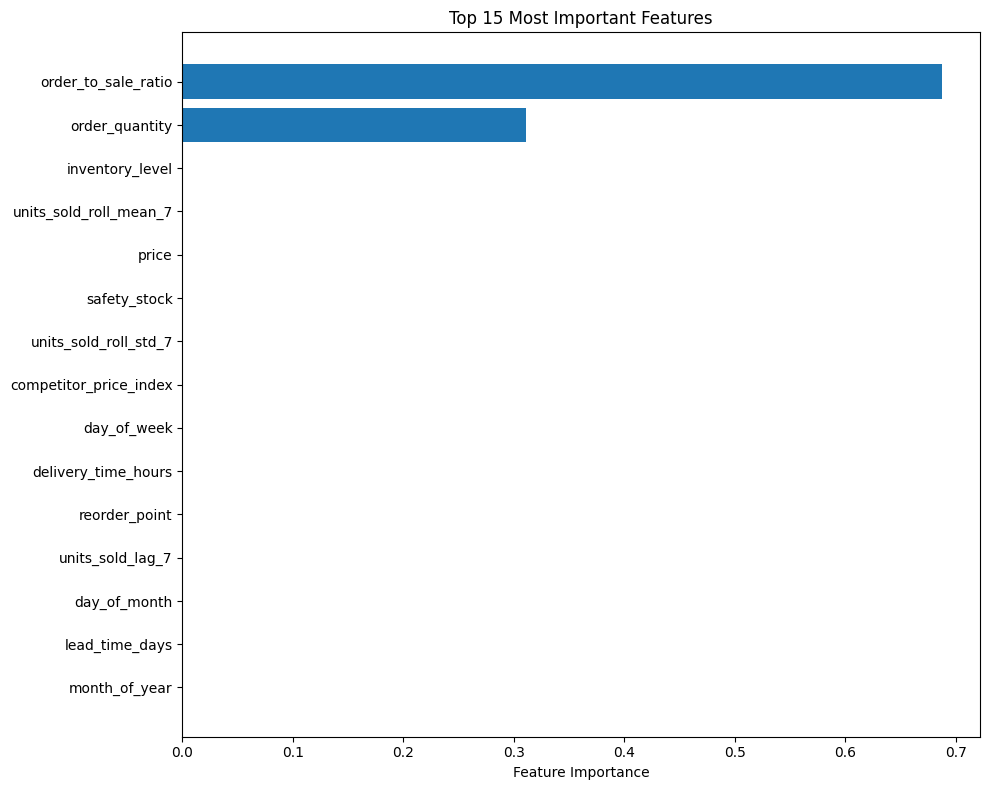

                   feature  importance
29     order_to_sale_ratio    0.687403
7           order_quantity    0.310731
4          inventory_level    0.000454
19  units_sold_roll_mean_7    0.000146
1                    price    0.000126
5             safety_stock    0.000115
20   units_sold_roll_std_7    0.000108
14  competitor_price_index    0.000098
15             day_of_week    0.000097
12     delivery_time_hours    0.000097


In [52]:
# Compute and visualize feature importances
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'feature': X_imputed.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
plt.barh(feature_importance.head(15)['feature'],
         feature_importance.head(15)['importance'])
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print the top 10 features in tabular form
print(feature_importance.head(10))


In [53]:
import joblib
import os

# Ensure models directory exists
os.makedirs('../models', exist_ok=True)

# Save the final model and imputer
joblib.dump(best_model, '../models/random_forest_model.joblib')
joblib.dump(imputer,    '../models/mean_imputer.joblib')

print("Model and imputer saved to ../models/")


Model and imputer saved to ../models/
